In [1]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,Input,Multiply
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
from keras import backend as K
from keras.models import Model
from keras.callbacks import EarlyStopping


Using TensorFlow backend.


In [2]:
train_data_dir = '..\\data\\train'
validation_data_dir = '..\\data\\test'

In [3]:
img_height, img_width=100,100
epochs = 100
batch_size = 16
nb_train_samples = 2049
nb_validation_samples = 1838

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=10.,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# 图片generator
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 2049 images belonging to 10 classes.


In [6]:
validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 1838 images belonging to 10 classes.


In [7]:
inputs = Input(shape=(100,100,3))
x = Conv2D(8, kernel_size=(5, 5), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
cnn_model = Model(inputs=inputs,outputs = x)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
cnn_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),#SGD(lr=1e-3,momentum=0.9)
              metrics=['accuracy'])

In [9]:
cnn_model_history = cnn_model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples// batch_size ,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples// batch_size,
        workers = 4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
128/128 [==============================] - 16s 129ms/step - loss: 1.9447 - acc: 0.2002 - val_loss: 2.0173 - val_acc: 0.2440
Epoch 2/100
128/128 [==============================] - 11s 84ms/step - loss: 1.6570 - acc: 0.3443 - val_loss: 1.4013 - val_acc: 0.4819
Epoch 3/100
128/128 [==============================] - 11s 84ms/step - loss: 1.3511 - acc: 0.4629 - val_loss: 1.0075 - val_acc: 0.6548
Epoch 4/100
128/128 [==============================] - 11s 85ms/step - loss: 1.0162 - acc: 0.6142 - val_loss: 0.8493 - val_acc: 0.6301
Epoch 5/100
128/128 [==============================] - 11s 86ms/step - loss: 0.9525 - acc: 0.6245 - val_loss: 0.8937 - val_acc: 0.6059
Epoch 6/100
128/128 [==============================] - 11s 85ms/step - loss: 0.7471 - acc: 0.7134 - val_loss: 0.6988 - val_acc: 0.7382
Epoch 7/100
128/128 [==============================] - 11s 84ms/step - loss: 0.5491 - acc: 0.7954 - val_loss: 0.2485 - val_acc: 0.9215
Epoch 

128/128 [==============================] - 10s 81ms/step - loss: 0.0282 - acc: 0.9893 - val_loss: 0.0877 - val_acc: 0.9693
Epoch 60/100
128/128 [==============================] - 10s 82ms/step - loss: 0.0350 - acc: 0.9883 - val_loss: 0.0547 - val_acc: 0.9830
Epoch 61/100
128/128 [==============================] - 10s 81ms/step - loss: 0.0380 - acc: 0.9858 - val_loss: 0.0282 - val_acc: 0.9896
Epoch 62/100
128/128 [==============================] - 14s 110ms/step - loss: 0.0296 - acc: 0.9888 - val_loss: 0.0865 - val_acc: 0.9764
Epoch 63/100
128/128 [==============================] - 15s 119ms/step - loss: 0.0488 - acc: 0.9810 - val_loss: 0.0542 - val_acc: 0.9813
Epoch 64/100
128/128 [==============================] - 15s 119ms/step - loss: 0.0276 - acc: 0.9927 - val_loss: 0.0531 - val_acc: 0.9830
Epoch 65/100
128/128 [==============================] - 15s 117ms/step - loss: 0.0356 - acc: 0.9888 - val_loss: 0.0568 - val_acc: 0.9802
Epoch 66/100
128/128 [==============================] - 2

In [10]:
inputs = Input(shape=(100,100,3))
c = Conv2D(8, kernel_size=(5, 5), activation='relu')(inputs)
p = MaxPooling2D(pool_size=(2, 2))(c)
r1 = Conv2D(16, kernel_size=(5, 5), activation='relu')(p)
r2 = Conv2D(16, kernel_size=(5, 5), activation='relu')(p)
r = Multiply()([r1,r2])
x = MaxPooling2D(pool_size=(2, 2))(r)
x = Conv2D(32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
rcnn1_model = Model(inputs=inputs,outputs = x)

In [11]:
rcnn1_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),#SGD(lr=1e-3,momentum=0.9)
              metrics=['accuracy'])

In [12]:
rcnn1_model_history=rcnn1_model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples// batch_size ,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples// batch_size,
        workers = 4)

Epoch 1/100
128/128 [==============================] - 12s 95ms/step - loss: 2.2288 - acc: 0.1894 - val_loss: 2.0120 - val_acc: 0.2086
Epoch 2/100
128/128 [==============================] - 11s 86ms/step - loss: 1.6590 - acc: 0.3399 - val_loss: 1.2610 - val_acc: 0.4934
Epoch 3/100
128/128 [==============================] - 11s 87ms/step - loss: 1.2177 - acc: 0.5063 - val_loss: 1.1570 - val_acc: 0.5110
Epoch 4/100
128/128 [==============================] - 11s 86ms/step - loss: 1.0155 - acc: 0.6006 - val_loss: 0.7560 - val_acc: 0.7135
Epoch 5/100
128/128 [==============================] - 12s 93ms/step - loss: 0.8793 - acc: 0.6548 - val_loss: 0.7025 - val_acc: 0.7355
Epoch 6/100
128/128 [==============================] - 12s 97ms/step - loss: 0.7661 - acc: 0.7046 - val_loss: 0.6287 - val_acc: 0.7398
Epoch 7/100
128/128 [==============================] - 12s 95ms/step - loss: 0.6402 - acc: 0.7632 - val_loss: 0.4522 - val_acc: 0.8293
Epoch 8/100
128/128 [==============================] - 

D:\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102941). Check your callbacks.
  % delta_t_median)


128/128 [==============================] - 16s 127ms/step - loss: 0.0433 - acc: 0.9824 - val_loss: 0.0939 - val_acc: 0.9671
Epoch 48/100
128/128 [==============================] - 16s 126ms/step - loss: 0.0860 - acc: 0.9697 - val_loss: 0.0779 - val_acc: 0.97372s - loss: 0. - ETA: 0s - loss: 0.0858 - acc: 0.96
Epoch 49/100
128/128 [==============================] - 16s 124ms/step - loss: 0.0632 - acc: 0.9766 - val_loss: 0.0920 - val_acc: 0.9665
Epoch 50/100
128/128 [==============================] - 16s 122ms/step - loss: 0.0704 - acc: 0.9746 - val_loss: 0.0362 - val_acc: 0.9857
Epoch 51/100
128/128 [==============================] - 16s 122ms/step - loss: 0.0596 - acc: 0.9756 - val_loss: 0.1088 - val_acc: 0.9638
Epoch 52/100
128/128 [==============================] - 17s 130ms/step - loss: 0.0527 - acc: 0.9829 - val_loss: 0.0495 - val_acc: 0.9813
Epoch 53/100
128/128 [==============================] - 16s 128ms/step - loss: 0.0432 - acc: 0.9849 - val_loss: 0.0319 - val_acc: 0.9857
Epoc

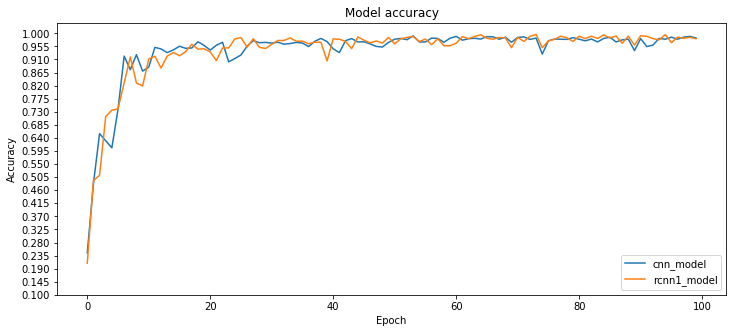

In [84]:
import matplotlib.pyplot as plt
plt.plot(cnn_model_history.history['val_acc'])
plt.plot(rcnn1_model_history.history['val_acc'])
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['cnn_model', 'rcnn1_model'], loc='lower right')
plt.yticks(np.linspace(0.1, 1, 21))
plt.show()

inputs = Input(shape=(100,100,3))
x = Conv2D(8, kernel_size=(5, 5), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
r1 = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
r2 = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
r = Multiply()([r1,r2])
x = MaxPooling2D(pool_size=(2, 2))(r)
x = Conv2D(32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(r)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
rnn2_model = Model(inputs=inputs,outputs = x)

In [15]:
rnn2_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),#SGD(lr=1e-3,momentum=0.9)
              metrics=['accuracy'])

In [16]:
rnn2_model_history=rnn2_model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples// batch_size ,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples// batch_size,
        workers = 4)

Epoch 1/100
128/128 [==============================] - 13s 102ms/step - loss: 2.2513 - acc: 0.1675 - val_loss: 2.0984 - val_acc: 0.1493
Epoch 2/100
128/128 [==============================] - 12s 93ms/step - loss: 1.6932 - acc: 0.3281 - val_loss: 1.2762 - val_acc: 0.4841
Epoch 3/100
128/128 [==============================] - 13s 104ms/step - loss: 1.2471 - acc: 0.5117 - val_loss: 0.8395 - val_acc: 0.6674
Epoch 4/100
128/128 [==============================] - 16s 123ms/step - loss: 1.0518 - acc: 0.5928 - val_loss: 0.7448 - val_acc: 0.7217
Epoch 5/100
128/128 [==============================] - 16s 125ms/step - loss: 0.9859 - acc: 0.6216 - val_loss: 0.6288 - val_acc: 0.7903
Epoch 6/100
128/128 [==============================] - 16s 123ms/step - loss: 0.7865 - acc: 0.6987 - val_loss: 0.6929 - val_acc: 0.7508
Epoch 7/100
128/128 [==============================] - 16s 122ms/step - loss: 1.0112 - acc: 0.6368 - val_loss: 0.8281 - val_acc: 0.6685
Epoch 8/100
128/128 [============================

128/128 [==============================] - 15s 119ms/step - loss: 0.1138 - acc: 0.9614 - val_loss: 0.1303 - val_acc: 0.9577
Epoch 61/100
128/128 [==============================] - 15s 120ms/step - loss: 0.1190 - acc: 0.9590 - val_loss: 0.0891 - val_acc: 0.9748
Epoch 62/100
128/128 [==============================] - 15s 119ms/step - loss: 0.1412 - acc: 0.9609 - val_loss: 0.1991 - val_acc: 0.94180s - loss: 0.1418 - acc: 0.960
Epoch 63/100
128/128 [==============================] - 15s 116ms/step - loss: 0.1123 - acc: 0.9619 - val_loss: 0.0693 - val_acc: 0.9802
Epoch 64/100
128/128 [==============================] - 15s 114ms/step - loss: 0.1067 - acc: 0.9609 - val_loss: 0.2384 - val_acc: 0.9336
Epoch 65/100
128/128 [==============================] - 16s 122ms/step - loss: 0.0936 - acc: 0.9683 - val_loss: 0.1858 - val_acc: 0.9341
Epoch 66/100
128/128 [==============================] - 17s 135ms/step - loss: 0.0790 - acc: 0.9741 - val_loss: 0.0628 - val_acc: 0.9791
Epoch 67/100
128/128 [==

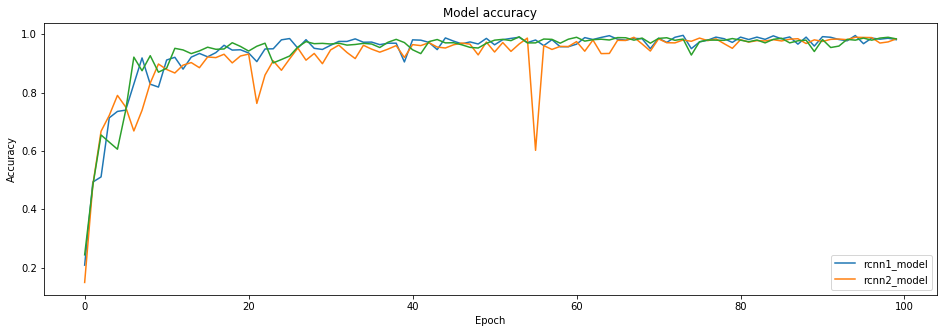

In [71]:
plt.plot(rcnn1_model_history.history['val_acc'])
plt.plot(rnn2_model_history.history['val_acc'])
plt.plot(cnn_model_history.history['val_acc'])
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['rcnn1_model', 'rcnn2_model'], loc='lower right')
plt.show()

In [86]:
len(cnn_model_history.history['val_acc'])

100

In [89]:
cnn_model_20=cnn_model_history.history['val_acc'][20:100]

In [92]:
rnn1_model_20=rcnn1_model_history.history['val_acc'][20:100]
rnn2_model_20=rnn2_model_history.history['val_acc'][20:100]

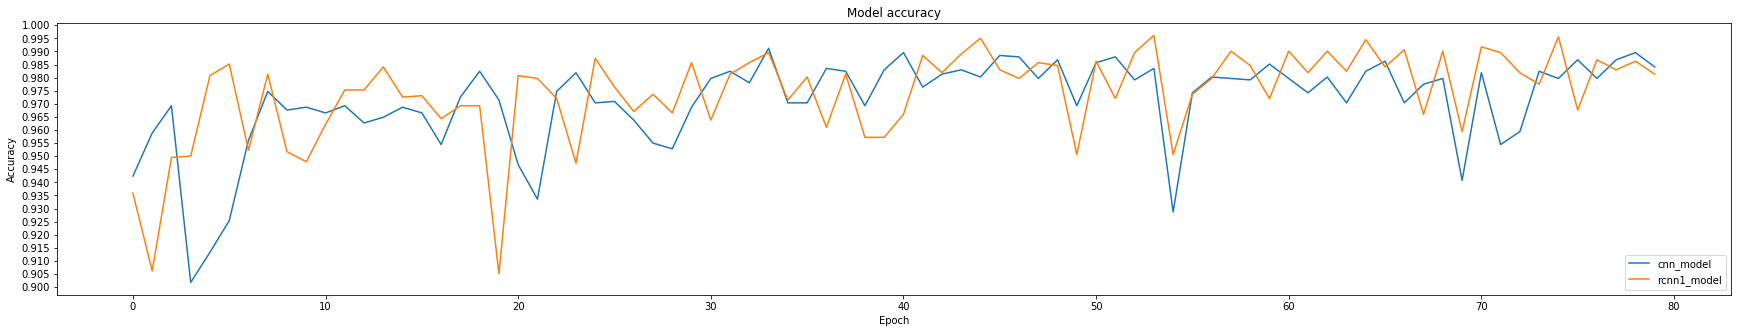

In [105]:
plt.plot(cnn_model_20)
plt.plot(rnn1_model_20)
plt.rcParams['figure.figsize'] = (30.0, 5.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['cnn_model', 'rcnn1_model'], loc='lower right')
plt.yticks(np.linspace(0.9, 1, 21))
plt.savefig('./mstar.jpg')
plt.show()